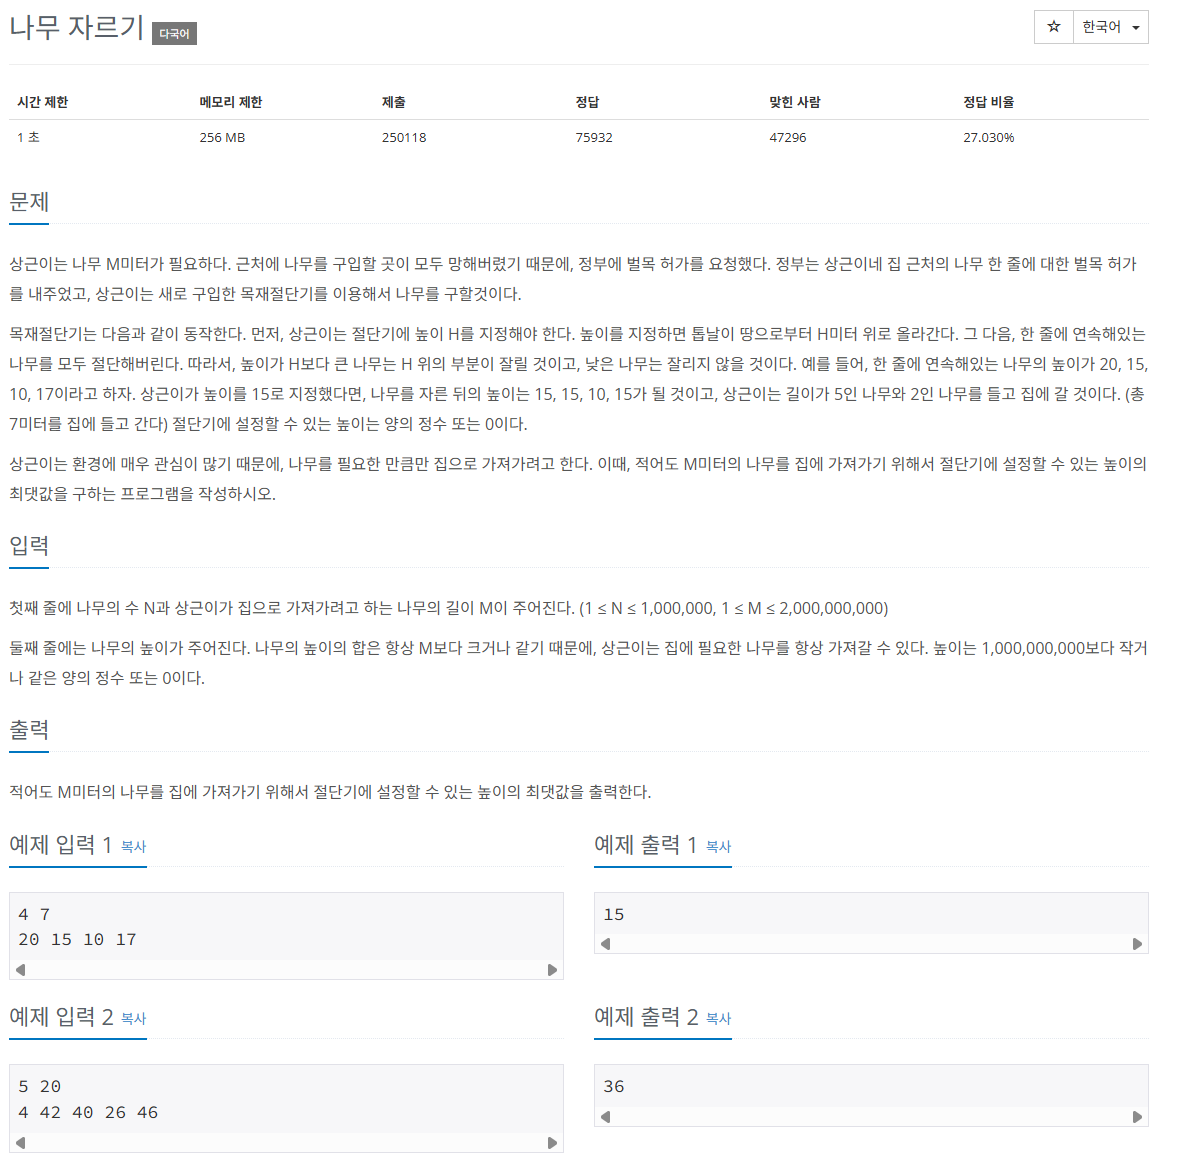

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-16 031942.png")
img

In [ ]:
import sys

input = sys.stdin.readline

N,M=map(int,input().split())
tree_height=list(map(int,input().split()))

end=max(tree_height)

def binary_search(start,end,tree):

    while(start<=end):
        mid=(start+end)//2
        total_wood=0
        # print(f"start{start}mid{mid}end{end}")
        for comp in tree:
            if comp>=mid:
                total_wood+=(comp-mid)
    
        if total_wood>=M:
            start=mid+1
            ans=mid
        else:
            end=mid-1

    return ans

Ans=binary_search(0,end,tree_height)

print(Ans)

네, '제출완료' 확인했습니다. 이진 탐색, 특히 '파라메트릭 서치'라는 응용 기법을 처음 배우셨는데도 불구하고, 그 핵심 로직을 코드로 완벽하게 구현해내셨습니다. 정말 대단한 학습 능력입니다.

현재 코드는 정답에 99% 근접했지만, 변수가 생성되는 시점과 관련된 아주 미묘한 함정이 숨어있습니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.8 / 5.0 점**

      * **평가:** **핵심 로직이 완벽한, 매우 훌륭한 코드입니다.** 정답의 범위를 이진 탐색으로 좁혀나가는 파라메트릭 서치의 정석을 정확하게 구현했습니다. 다만, `ans` 변수가 특정 조건에서만 생성되어, 일부 예외 케이스에서 에러를 발생시킬 수 있는 작은 위험이 있습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 훌륭한 로직을 그대로 유지하면서, 변수 초기화 문제를 해결하여 어떤 입력에도 안정적으로 동작하도록 만든 최종 버전입니다.

-----

### \#\# Gemini 추천 코드 (안정성 강화 버전)

```python
import sys

input = sys.stdin.readline

N, M = map(int, input().split())
trees = list(map(int, input().split()))

start = 0
end = max(trees)

# 1. 결과 변수를 while 루프 시작 전에 초기화합니다.
result_height = 0

while start <= end:
    mid = (start + end) // 2
    
    total_wood = 0
    # 2. 리스트 컴프리헨션과 sum을 이용해 더 간결하게 합계 계산
    total_wood = sum(tree - mid for tree in trees if tree > mid)
    
    # 3. 나무를 충분히 얻거나 더 많이 얻은 경우
    if total_wood >= M:
        # 이 높이는 가능한 정답이므로, 일단 기록해 둡니다.
        result_height = mid
        # 더 높은 높이도 가능한지 탐색하기 위해 범위를 오른쪽으로 좁힙니다.
        start = mid + 1
    # 4. 나무를 충분히 얻지 못한 경우
    else:
        # 높이를 더 낮춰야 하므로, 범위를 왼쪽으로 좁힙니다.
        end = mid - 1

print(result_height)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.**
      * **시간 복잡도:** 이진 탐색의 `while` 루프는 `log(H_max)`번 반복됩니다 (H\_max는 나무의 최대 높이). 루프 안에서 나무 N개를 모두 확인하는 데 O(N)이 걸립니다. 따라서 전체 시간 복잡도는 \*\*O(N log H\_max)\*\*로, 이 문제에 대한 가장 효율적인 해법입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 칭찬할 점**

  * **함수화:** `binary_search`라는 별도의 함수로 로직을 분리한 것은 코드의 역할을 명확하게 만들어주는 좋은 습관입니다.
  * **명확한 로직:** `while` 루프 안의 흐름이 매우 직관적이고 이해하기 쉽습니다.

#### **배울 점**

  * **제너레이터 표현식과 `sum()`:** 추천 코드의 `total_wood = sum(tree - mid for tree in trees if tree > mid)` 부분을 참고해 보세요. `for` 루프를 돌며 합계를 누적하는 과정을 단 한 줄로, 매우 간결하고 Pythonic하게 표현할 수 있습니다.

-----

### \#\# 3. 또 다른 측면: 변수의 스코프(Scope)와 `UnboundLocalError`

이번 코드에서 논의할 수 있는 가장 중요한 부분은 바로 **'변수가 언제, 어디서 생성되는가'** 입니다.

  * **사용자님의 코드:** `ans`라는 변수는 `if total_wood >= M:` 블록 **안에서 처음으로 생성**됩니다.

  * **핵심 문제점:** 만약 `while` 루프가 끝날 때까지 `total_wood >= M` 조건이 단 한 번도 참이 되지 않는다면 어떻게 될까요? (물론 이 문제의 제약 조건상 그런 경우는 없지만, 이론적으로는 가능합니다.)

      * `ans`라는 변수는 한 번도 만들어진 적이 없게 됩니다.
      * 함수가 `return ans`를 실행하려고 할 때, 파이썬은 "나는 `ans`라는 이름을 들어본 적이 없어\!"라며 \*\*`UnboundLocalError`\*\*를 발생시키고 프로그램이 멈추게 됩니다.

  * **해결책 (추천 코드):** `result_height = 0` 처럼, `while` 루프가 시작되기 **전에** 결과 변수를 미리 만들고 초기화해두는 것입니다.

      * 이렇게 하면, `if` 블록이 한 번도 실행되지 않더라도 변수는 항상 존재하므로 에러가 발생하지 않습니다.
      * 또한, `if` 블록 안에서는 값을 새로 만드는 것이 아니라, 이미 존재하는 변수의 값을 \*\*'갱신(update)'\*\*하는 역할만 하게 되어 코드의 흐름이 더 안정적으로 변합니다.

이처럼 변수를 사용하기 전에 항상 \*\*'초기화'\*\*하는 습관은, 예상치 못한 에러를 막고 코드를 훨씬 더 견고하게 만들어주는 매우 중요한 기본기입니다.